#### **LSE Data Analytics Online Career Accelerator** 
#### Course 201: Data Analytics with Python

## Assignment template: Covid data

## Student Note
This template can be used to better understand the suggested workflow and how to approach the questions. You are welcome to add code and markdown blocks to the various sections to add either code or comments. Make sure to add code cells as applicable, and to comment all your code blocks.

You have the option to populate your notebook with all the elements typically contained within the report, or to submit a separate report. In the case of submitting your notebook, you can embed images, links and text where appropriate in addition to the text notes added.

**SPECIAL NOTE**
- Submit your Jupyter Notebook with the following naming convention: `LSE_DA201_assignment_[your name]_[your surname]`
- You should submit a zipped folder containing all the elements used in your notebook (data files, images, etc)

> ***Markdown notes:*** Remember to change cell types to `Markdown` and take a look here: [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to add formatted text, links and images to your markdown documents.

### 0) Environment preparation
These settings are provided for you. You do not need to make any changes.

In [85]:
# Import the required libraries and set plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,10)})

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

### 1) Assignment activity 1: [Prepare your GitHub repository](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-1-prepare-your-github-repository?module_item_id=20647)

#### 1.1) Report/notebook expectations:
- Demonstrate your GitHub setup consisting of the load and push updates of all the Jupyter Notebook files. (**Hint**: Make sure that your github username, the directory structure and updates are visible in the screenshot. Make sure to provide a zipped copy of the folder containing your submission notebook as well as supporting files such as images used in the notebook.)

#### Required: Report submission:
Insert URL to your public GitHub repository and a screenshot (double click cell to edit)
- [My Github Repo](https://github.com/Oliyamehdi/Data-Analysis-with-Python)

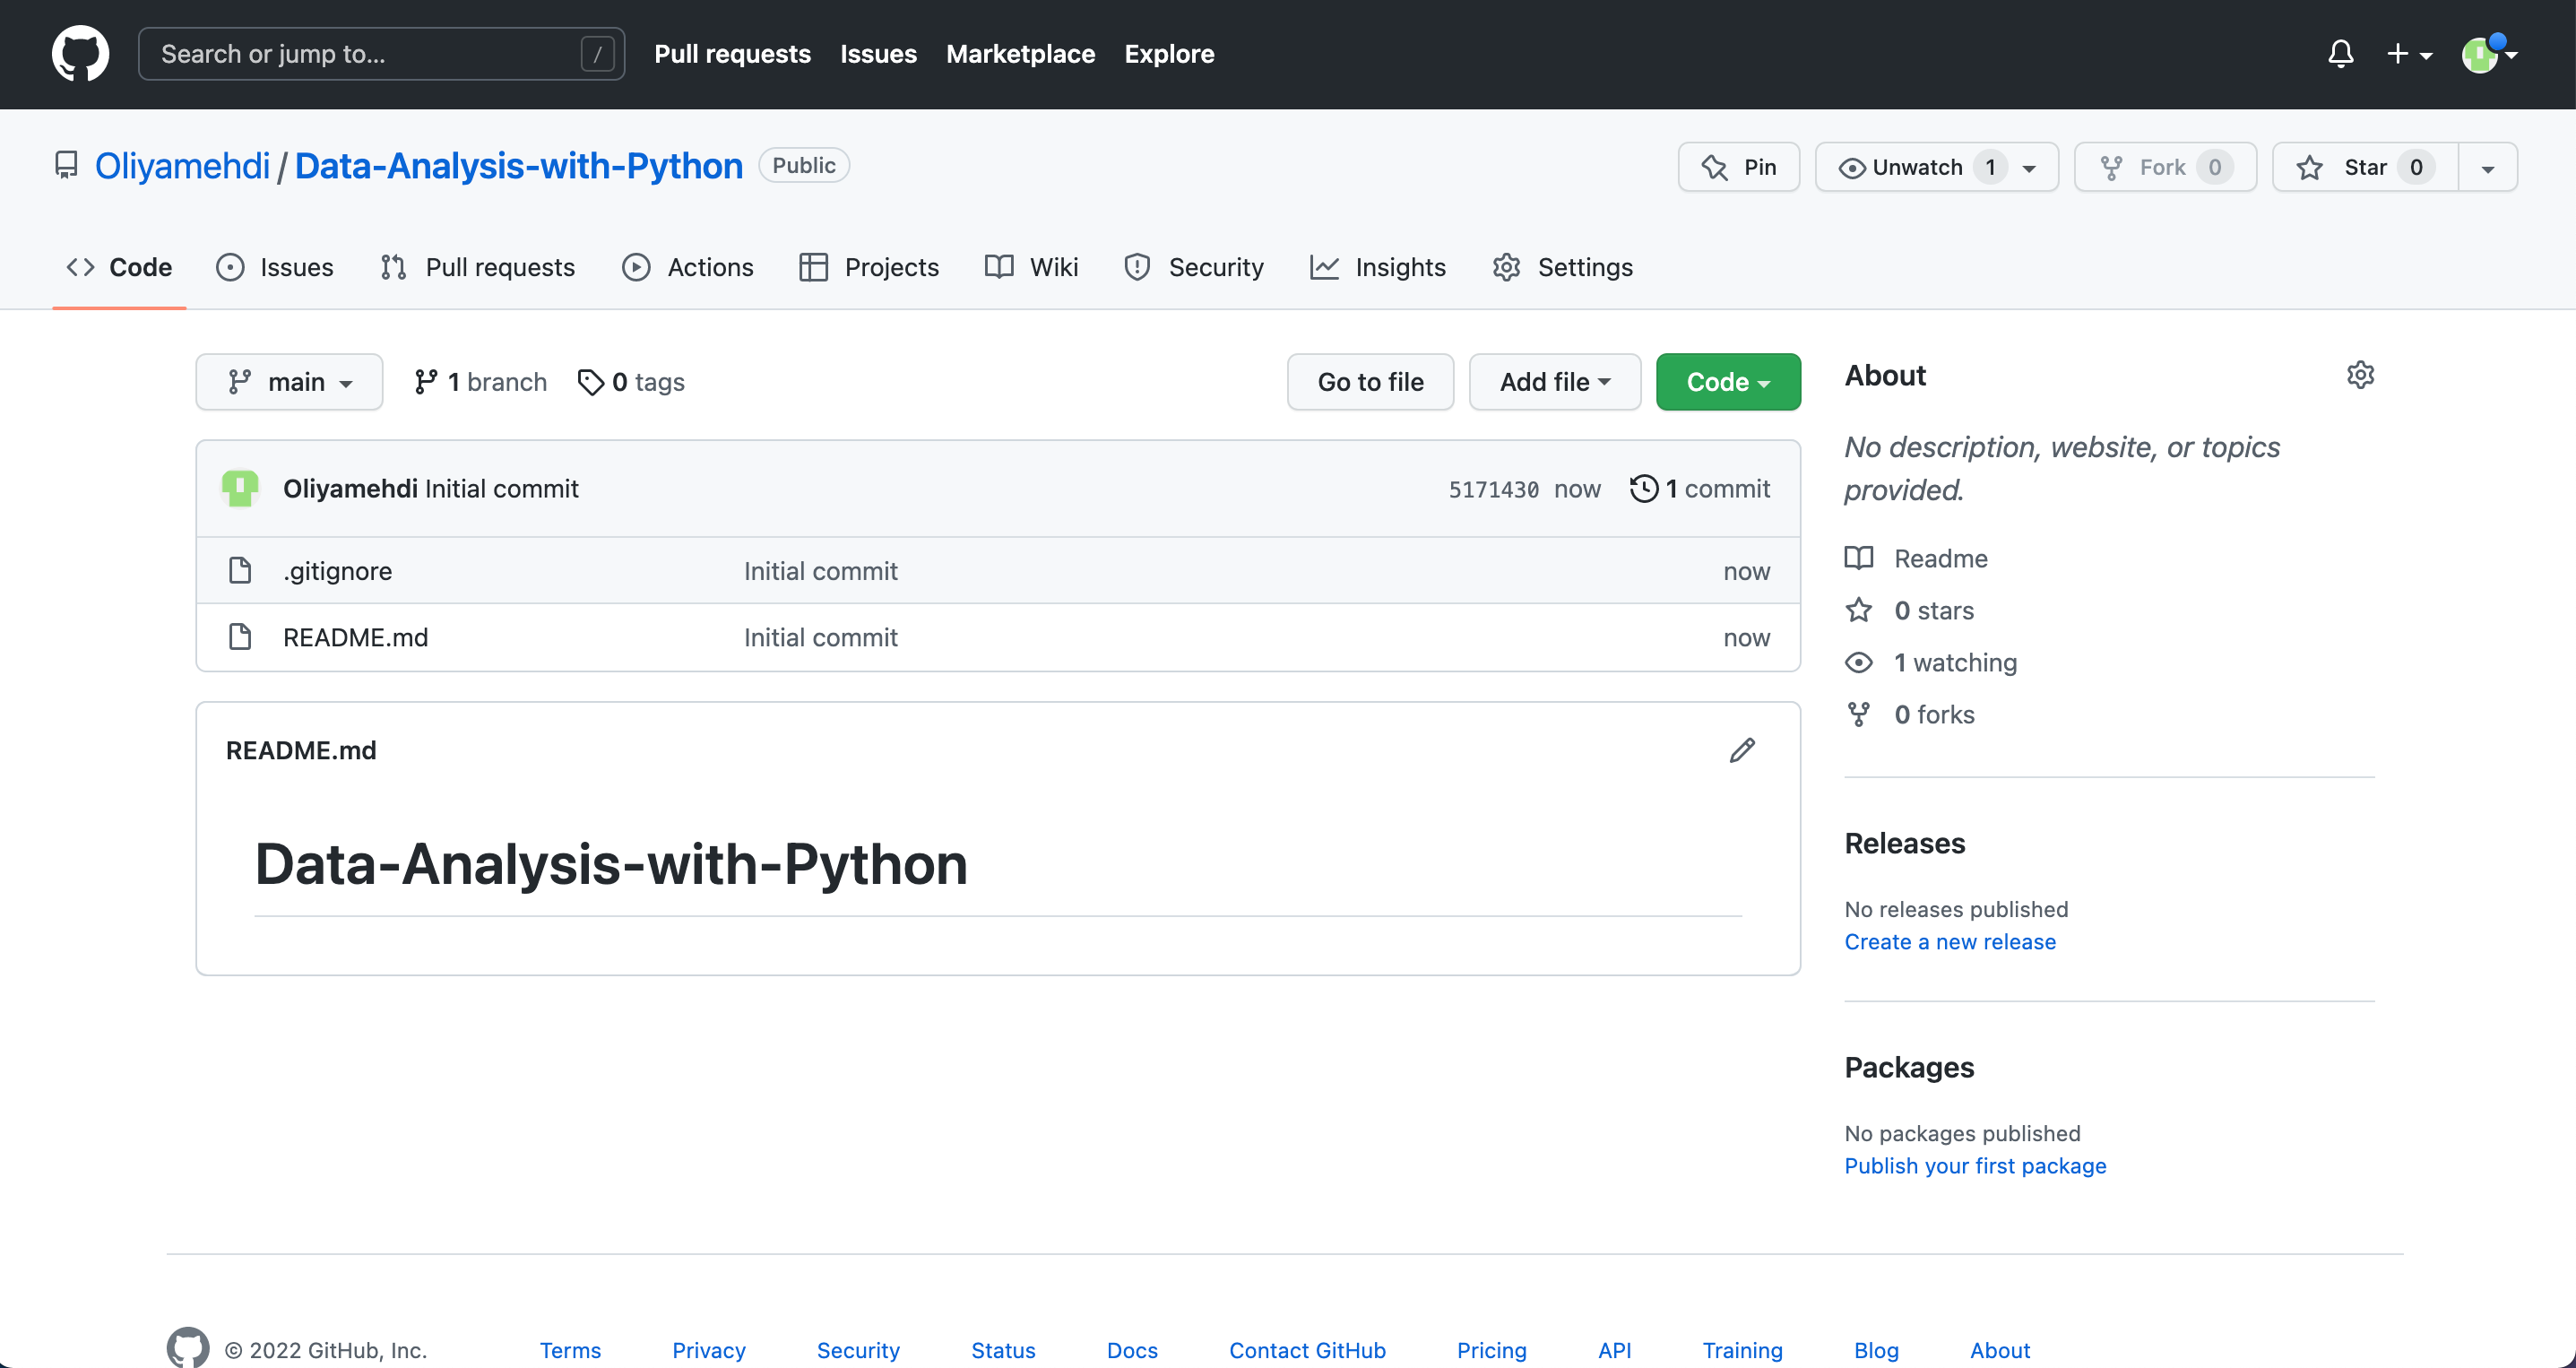

- Screenshot demo (replace with your own)
Alternatively you need to refer to a local image and include this image in your submission.)

### 2) Assignment activity 2: [Import and explore data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-2-import-and-explore-the-data?module_item_id=20648)

#### 2.1) Report expectations:
- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data.
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods, and note the observations regarding data types, number or records and features
- Identify missing data
- Filter/subset data
- Aggregate data (totals and by month)
- Note observations

GOAL - To increase the number of fully vaccinated individuals(fully vaccinated are those who have taken both first dose and second dose).

For the purpose of this project plese note the definitons and consideratins below:

The goal is to increase the number of fully vaccinated individuals(fully vaccinated are those who have taken both first dose and second dose).i.e get all indiviuals to take the second dose who have taken the first dose.

All indiviulas will be considered 100% vaccinated when those who have taken First dose have also taken the second dose.

It does not take into consideration individuals who have not taken the first dose (population of a region). Therefore the whole/base here is the first dose vaccinated individuals.

Also to be noted the second dose and vaccinated numbers are the same, hence it can be assumed that the second dose and vaccianted numbers are interchangeable as per the defination above.


In [6]:
# Load the covid cases and vaccine data sets as cov and vac respectively

In [7]:
cov =  pd.read_csv('covid_19_uk_cases.csv')

In [8]:
vac =  pd.read_csv('covid_19_uk_vaccinated.csv')

In [9]:
# Explore the DataFrames with the appropriate functions

In [10]:
#view the number of rows and columns and datatypes
cov.shape
cov.dtypes

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object

In [11]:
#view the number of rows and columns and datatypes
vac.shape
vac.dtypes

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object

In [12]:
# View the first 3 rows of the dataset
cov.head(3)

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0


In [13]:
vac.tail(3)

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
7581,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-12,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-13,0,0,0
7583,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-14,0,0,0


In [14]:
#checking for missing values for cov dataset
cov.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      2
Cases                       2
Recovered                   2
Hospitalised                2
dtype: int64

As seen above there are a few missing values for Deaths,Cases, Recovered, Hospitalised that need to be treated.

In [15]:
#checking for missing values for vac dataset 
vac.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Vaccinated                  0
First Dose                  0
Second Dose                 0
dtype: int64

In [16]:
# Treating missing values using the .mean() function ONLY for the cov dataset.

cov['Deaths'].fillna(cov['Deaths'].mean,inplace=True)
cov['Cases'].fillna(cov['Cases'].mean,inplace=True)
cov['Recovered'].fillna(cov['Recovered'].mean,inplace=True)
cov['Hospitalised'].fillna(cov['Hospitalised'].mean,inplace=True)

In [17]:
# Check of the mising values were treated correctly
cov.isna().sum()

Province/State              0
Country/Region              0
Lat                         0
Long                        0
ISO 3166-1 Alpha 3-Codes    0
Sub-region Name             0
Intermediate Region Code    0
Date                        0
Deaths                      0
Cases                       0
Recovered                   0
Hospitalised                0
dtype: int64

The sum of 0 suggests all missing values were treated correctly.

In [18]:
# Getting a summary understanding of the dataset with the describe()

In [19]:
vac.describe()

,Lat,Long,Intermediate Region Code,Vaccinated,First Dose,Second Dose
count,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000,7584.000000
mean,21.840267,-41.440047,12.500000,5913.547600,6192.822257,5913.547600
std,28.305518,30.527529,14.009849,10846.410258,11439.883647,10846.410258
min,-51.796300,-81.254600,0.000000,0.000000,0.000000,0.000000
25%,17.851075,-64.667625,0.000000,0.000000,0.000000,0.000000
50%,20.503650,-60.855483,2.500000,0.000000,0.000000,0.000000
75%,39.448675,-5.152225,29.000000,8338.000000,7505.500000,8338.000000
max,55.378100,-2.364400,29.000000,69619.000000,94038.000000,69619.000000


From the above summary we can get an idea of the size of the dataset,the average,the minimun and maximum values,qunatiles of the dataset. 

In [20]:
# Create DataFrame based on Gibraltar data
# Hint: newdf = df[df[col]==index]

In [21]:
df_gibr=cov[cov['Province/State']== 'Gibraltar']

In [22]:
df_gibr

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
3792,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0.0,0.0,0.0,0.0
3793,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0.0,0.0,0.0,0.0
3794,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0.0,0.0,0.0,0.0
3795,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0.0,0.0,0.0,0.0
3796,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0.0,0.0,0.0,0.0
3797,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-27,0.0,0.0,0.0,0.0
3798,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-28,0.0,0.0,0.0,0.0
3799,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-29,0.0,0.0,0.0,0.0
3800,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-30,0.0,0.0,0.0,0.0
3801,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-31,0.0,0.0,0.0,0.0


In [23]:
# Explore behaviour over time

In [24]:
# Breif view of gibralter's cases over time.
df_gibr[['Date','Cases','Hospitalised']]

,Date,Cases,Hospitalised
3792,2020-01-22,0.0,0.0
3793,2020-01-23,0.0,0.0
3794,2020-01-24,0.0,0.0
3795,2020-01-25,0.0,0.0
3796,2020-01-26,0.0,0.0
3797,2020-01-27,0.0,0.0
3798,2020-01-28,0.0,0.0
3799,2020-01-29,0.0,0.0
3800,2020-01-30,0.0,0.0
3801,2020-01-31,0.0,0.0


The above dataframe would offer more insight if it were plotted on a line graph as it would indicate a trend.
The hospitalisation data on some days are higher than the case rate. However cumulatively the cases are higher that number of those hospitalised.

In [25]:
# Total cases for Gibraltar
df_gibr['Cases'].sum()

1413853.0

In [26]:
#Total hospitalised for Gibralter
df_gibr['Hospitalised'].sum()

649459.0

In [27]:
# Totals of the cov datasets for all regions
cov[['Cases','Recovered','Hospitalised','Deaths']].sum()

Series([], dtype: float64)

In [28]:
#Totals of the vaccination datasets for all regions
vac[['First Dose','Second Dose','Vaccinated']].sum()

First Dose     46966364
Second Dose    44848345
Vaccinated     44848345
dtype: int64

From calculating totals it is seen the Second Dose and Vaccation data are the same. 

At this stage the focus is to undestand the breath of the data and not necesarily on depth. Here we get an understanding of the columns and rows, determine a basic summary of the dataset at hand.

Identify missing values replace then with the best method to complete and clean the data set and prepare it for deeper analysis.

A subset of the gibralter data set was made to understand if there is merit in dividing the data into region wise to see if greater insights can be drawn

Calculating totals gave a whole view of teh picture however with  the business question at hand understning the data over time makes more sense for deliverable insights and nit just relyig on total numbers.

Visulalizing data can be very insighful at this point as with huge sums of data the numbers dont necessarily convey as much as a graph would.


### 3) Assignment activity 3: [Merge and analyse the data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-3-merge-and-analyse-the-data?module_item_id=20649)

#### 3.1) Report expectations:
- Merge and explore the data
- Convert the data type of the Date column from object to datetime
- Create a dataset that meets the expected parameters
- Add calculated features to dataframes (difference between first and second dose vaccinations)
- Filter and sort output
- Observe totals and percentages as a total and over time
- Note observations

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised.

In [29]:
# Join the DataFrames as covid where you merge cov and vac

In [30]:
mer=pd.merge(cov,vac)

In [31]:
#view the number of columns and rows
mer.shape

(7584, 15)

In [32]:
#view all the column names
mer.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised', 'Vaccinated', 'First Dose', 'Second Dose'],
      dtype='object')

In [33]:
# Clean up / drop unnecessary columns 
covid=mer.drop(['Lat','Long','ISO 3166-1 Alpha 3-Codes','Sub-region Name','Intermediate Region Code'],axis = 1)

In [34]:
# Explore the new DataFrame

In [35]:
covid.shape
covid.dtypes

Province/State    object
Country/Region    object
Date              object
Deaths            object
Cases             object
Recovered         object
Hospitalised      object
Vaccinated         int64
First Dose         int64
Second Dose        int64
dtype: object

As seen the date column's datatype is an object which need to be converted to a datetime dataype to be able to use the date column for further analysis.

In [36]:
# Fix the date column data type

In [37]:
# change object to date
covid['Date']= pd.to_datetime(covid['Date'])

In [38]:
#check to see changed datatypes
covid.dtypes

Province/State            object
Country/Region            object
Date              datetime64[ns]
Deaths                    object
Cases                     object
Recovered                 object
Hospitalised              object
Vaccinated                 int64
First Dose                 int64
Second Dose                int64
dtype: object

In [39]:
covid.head(2)

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,2020-01-22,0.0,0.0,0.0,0.0,0,0,0
1,Anguilla,United Kingdom,2020-01-23,0.0,0.0,0.0,0.0,0,0,0


In [41]:
#Calculating totals of the dataset
totals=covid.groupby("Province/State")[['Date','Cases','Recovered','Hospitalised','Vaccinated','Deaths']].sum().sort_values(['Cases'],ascending=False)

KeyError: 'Cases'

In [ ]:
totals.reset_index(inplace=True)

In [ ]:
totals

As seen above the Death column is calculated cumulatively as opposed to the other variables over time.

In [ ]:
# Groupby and calculate difference between first and second dose

In [42]:
# Group by Province/State First Dose
a= covid.groupby("Province/State")[["First Dose"]].sum()\
.sort_values(['First Dose'],ascending=False)

In [43]:
# Group by Province/State Second Dose
b=covid.groupby("Province/State")[["Second Dose"]].sum()\
.sort_values(['Second Dose'],ascending=False)

In [44]:
# Merged two groupby dataframe
df1= pd.merge(a,b,how='left',on='Province/State')

In [45]:
df1

,First Dose,Second Dose
Province/State,,
Gibraltar,5870786,5606041
Montserrat,5401128,5157560
British Virgin Islands,5166303,4933315
Anguilla,4931470,4709072
Isle of Man,4226984,4036345
Falkland Islands (Malvinas),3757307,3587869
Cayman Islands,3522476,3363624
Channel Islands,3287646,3139385
Turks and Caicos Islands,3052822,2915136


In [46]:
#Differnce bewteen those who have taken the first dose but not the second
df1['Difference']=df1["First Dose"]-df1["Second Dose"]

In [47]:
df1.sort_values(['Difference'])

,First Dose,Second Dose,Difference
Province/State,,,
"Saint Helena, Ascension and Tristan da Cunha",2348310,2242421,105889
Others,2583151,2466669,116482
Bermuda,2817981,2690908,127073
Turks and Caicos Islands,3052822,2915136,137686
Channel Islands,3287646,3139385,148261
Cayman Islands,3522476,3363624,158852
Falkland Islands (Malvinas),3757307,3587869,169438
Isle of Man,4226984,4036345,190639
Anguilla,4931470,4709072,222398


In [48]:
# Percenatge of those who are still to take their second dose 
df1['Difference_Percentage']=df1["Difference"]/df1["First Dose"]*100

In [49]:
df1.sort_values(['Difference_Percentage'], ascending=False)

,First Dose,Second Dose,Difference,Difference_Percentage
Province/State,,,,
Turks and Caicos Islands,3052822,2915136,137686,4.510122
Isle of Man,4226984,4036345,190639,4.510048
Anguilla,4931470,4709072,222398,4.509771
British Virgin Islands,5166303,4933315,232988,4.509763
Cayman Islands,3522476,3363624,158852,4.509669
Channel Islands,3287646,3139385,148261,4.509640
Montserrat,5401128,5157560,243568,4.509577
Falkland Islands (Malvinas),3757307,3587869,169438,4.509560
Gibraltar,5870786,5606041,264745,4.509532


As seen above the Province of Turks and Caicos Islands has the highest percentage of people left to take the second dose while Saint Helena, Ascension and Tristan da Cunha has the least percentage.

In [50]:
# Fully vaccinated perct individuals( First Dose and Second Dose)

df1['Fully Vaccinated']=df1['Second Dose']/df1['First Dose']*100 

In [51]:
df1.sort_values(['Fully Vaccinated'], ascending=False)

,First Dose,Second Dose,Difference,Difference_Percentage,Fully Vaccinated
Province/State,,,,,
"Saint Helena, Ascension and Tristan da Cunha",2348310,2242421,105889,4.509158,95.490842
Others,2583151,2466669,116482,4.509299,95.490701
Bermuda,2817981,2690908,127073,4.509363,95.490637
Gibraltar,5870786,5606041,264745,4.509532,95.490468
Falkland Islands (Malvinas),3757307,3587869,169438,4.509560,95.490440
Montserrat,5401128,5157560,243568,4.509577,95.490423
Channel Islands,3287646,3139385,148261,4.509640,95.490360
Cayman Islands,3522476,3363624,158852,4.509669,95.490331
British Virgin Islands,5166303,4933315,232988,4.509763,95.490237


As seen above province of Saint Helena, Ascension and Tristan da Cunha has the highest number of Vaccinated people while Turks and Caicos Islands has the least number of vaccinated people.

In [52]:
# Groupby and calculate difference between first and second dose over time

In [53]:
# Copy of the original dataframe 
a_covid=covid.copy()

In [54]:
a_covid.head(3)

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,2020-01-22,0.0,0.0,0.0,0.0,0,0,0
1,Anguilla,United Kingdom,2020-01-23,0.0,0.0,0.0,0.0,0,0,0
2,Anguilla,United Kingdom,2020-01-24,0.0,0.0,0.0,0.0,0,0,0


In [55]:
#compute the difference between first and second dose in the new dataset
a_covid['Difference']= a_covid['First Dose'] - a_covid['Second Dose']

In [56]:
a_covid.tail(3)

,Province/State,Country/Region,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose,Difference
7581,Others,United Kingdom,2021-10-12,137944.0,8231437.0,0.0,386.0,1482,2027,1482,545
7582,Others,United Kingdom,2021-10-13,138080.0,8272883.0,0.0,0.0,0,0,0,0
7583,Others,United Kingdom,2021-10-14,138237.0,8317439.0,0.0,0.0,0,0,0,0


In [57]:
# determine the date in months for easier comprehension
a_covid['Month']=pd.to_datetime(a_covid['Date']).dt.to_period('M')

In [58]:
# Groupby the provinnce ,months and determine the differenc between first dose and second dose.
covid_months=a_covid.groupby(['Province/State', 'Month'])[['Difference']].sum()

In [59]:
covid_months.reset_index(inplace=True)

In [60]:
covid_months

,Province/State,Month,Difference
0,Anguilla,2020-01,0
1,Anguilla,2020-02,0
2,Anguilla,2020-03,0
3,Anguilla,2020-04,0
4,Anguilla,2020-05,0
5,Anguilla,2020-06,0
6,Anguilla,2020-07,0
7,Anguilla,2020-08,0
8,Anguilla,2020-09,0
9,Anguilla,2020-10,0


As seen in the Difference column we see negative values which indicate that in that particular month second doses adminstered were higher that the first dose.

The data set is limited in its scope as the percenatges that were deduced do not conclusively suggest a pattern. The difference between each region is very small to make an effective conclusion.

While Turks and Caicos Islands has the highest percentage of people left to take the second dose the differnce is very small.

Province 'Others' needs to be defined as it has the second highest vaccinated people in the dataset.

### 4) Assignment activity 4: [Visualise and identify initial trends](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-4-visualise-and-identify-initial-trends?module_item_id=21381)

The government is looking to promote second dose vaccinations and looking for the first area to test a new campaign. They are looking for the highest number of people who have received a first dose and not a second dose. 
- Where should they target?
- Which provinces have the highest number (actual numbers) and highest relative numbers (second dose only/first dose)
- Visualise both outputs.

#### 4.1) Report expectations:
- Consider additional features (deaths and recoveries)
- Visualise the data
- Note observations
 - Do deaths follow the same patterns observed in vaccination data (daily vs cumulative)?
 - Do we need to separate groups of data for specific variables and analyse them in isolation (Others) to be able to observe the patterns?

In [61]:
# Absolute numbers

In [62]:
df1.reset_index(inplace=True)

In [63]:
df1.sort_values(['Difference'],ascending=False)

,Province/State,First Dose,Second Dose,Difference,Difference_Percentage,Fully Vaccinated
0,Gibraltar,5870786,5606041,264745,4.509532,95.490468
1,Montserrat,5401128,5157560,243568,4.509577,95.490423
2,British Virgin Islands,5166303,4933315,232988,4.509763,95.490237
3,Anguilla,4931470,4709072,222398,4.509771,95.490229
4,Isle of Man,4226984,4036345,190639,4.510048,95.489952
5,Falkland Islands (Malvinas),3757307,3587869,169438,4.509560,95.490440
6,Cayman Islands,3522476,3363624,158852,4.509669,95.490331
7,Channel Islands,3287646,3139385,148261,4.509640,95.490360
8,Turks and Caicos Islands,3052822,2915136,137686,4.510122,95.489878
9,Bermuda,2817981,2690908,127073,4.509363,95.490637


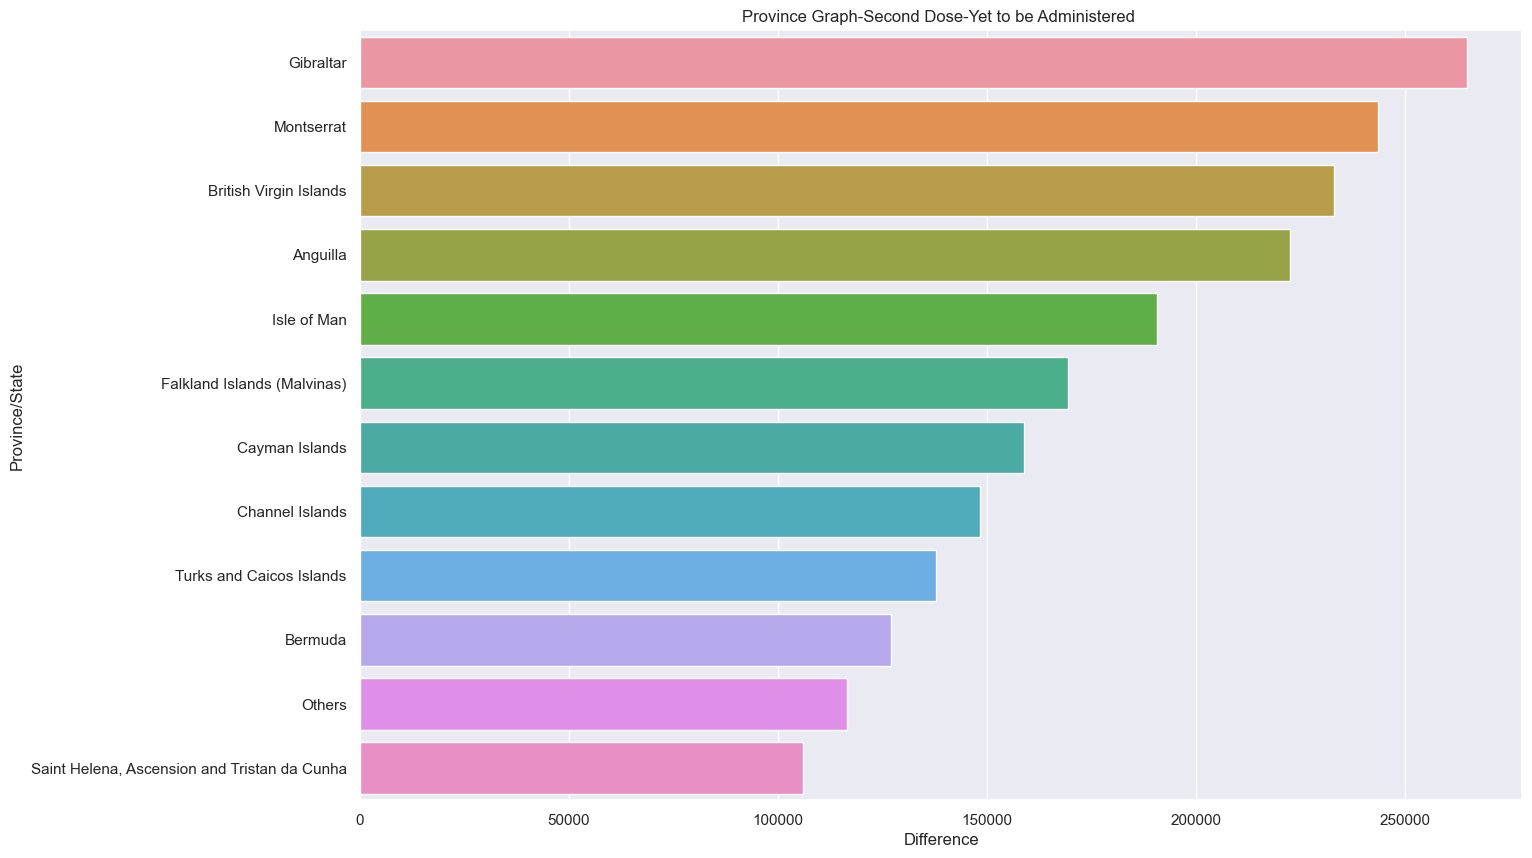

In [64]:
sns.barplot(x='Difference',y='Province/State',data=df1).set(title='Province Graph-Second Dose-Yet to be Administered ')
plt.show()

As shown in the graph above in absolute numbers Gibralter has the highest number of people yet to be vaccinated.

In [65]:
# Relative numbers (%)

In [66]:
df2 =df1.sort_values(['Fully Vaccinated'],ascending=False)

In [67]:
df2

,Province/State,First Dose,Second Dose,Difference,Difference_Percentage,Fully Vaccinated
11,"Saint Helena, Ascension and Tristan da Cunha",2348310,2242421,105889,4.509158,95.490842
10,Others,2583151,2466669,116482,4.509299,95.490701
9,Bermuda,2817981,2690908,127073,4.509363,95.490637
0,Gibraltar,5870786,5606041,264745,4.509532,95.490468
5,Falkland Islands (Malvinas),3757307,3587869,169438,4.509560,95.490440
1,Montserrat,5401128,5157560,243568,4.509577,95.490423
7,Channel Islands,3287646,3139385,148261,4.509640,95.490360
6,Cayman Islands,3522476,3363624,158852,4.509669,95.490331
2,British Virgin Islands,5166303,4933315,232988,4.509763,95.490237
3,Anguilla,4931470,4709072,222398,4.509771,95.490229


In [91]:
df2= sns.barplot(x = 'Fully Vaccinated', y = 'Province/State',data = df2).set(title='Province_Fully_Vaccinated ')
af2.setxticklabels(df2.get_xticklabels(),horizintalalignment='rigt')

max_y_lim = 95.491000
min_y_lim = 95.480000
plt.ylim(min_y_lim, max_y_lim)

plt.show()


AttributeError: 'list' object has no attribute 'get'

As seen above the difference between in Fully Vaccinated percentage is very marginal and not enough for us to conclusively select a region.

In [ ]:
# Let's smooth out the data by looking at monthly figures

In [ ]:
# View Month datatype to plot monthly figures
covid_months.dtypes

In [ ]:
# Convert Month datatype to string first
covid_months['Month'] = covid_months['Month'].astype(str)
covid_months.dtypes

In [ ]:
# Convert Month datatype from string to datetime
covid_months['Month'] = pd.to_datetime(covid_months['Month'])
covid_months.dtypes

In [ ]:
# Line plot with those who have taken first dose but not the second
sns.lineplot(x = "Month", y = "Difference", hue='Province/State', data = covid_months).set(title='Province_Second_Dose_Yet_To_Be_Administered)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Subset the data to exclude dates before 01-01-2021(as seen in the graph they are 0 vaccinations at that time)
covid_months_excluded=covid_months[covid_months['Month']>='2021-01-01']

In [ ]:
covid_months_excluded

In [ ]:
# Re plotted Lineplot with those who have taken the first dose but not the second
sns.lineplot(x = "Month", y = "Difference", hue='Province/State', data = covid_months_excluded).set(title='Province_Second_Dose_Yet_To_Be_Administered)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

As seen in the re plotted graph there is negative value as on those months a lot of people got vaccinated and the second dose was highes than the first. However cumilatively the second dose is lesser than the first dose in all regions. 

What can be further explored is the breakup of each region the second dose percentage and cases to understnd the reason behind the surge in taking the vaccine which could help further our insights into marketing activites that could be directed towards them. 

In [ ]:
# Other features evaluated (data preparation, output and plots)

In [ ]:
# Province wise hospitalistion 
c2=covid.copy()

In [ ]:
c2.head(4)

In [ ]:
hosp_df= c2.groupby(['Province/State','Date'])['Hospitalised'].sum().reset_index()

In [ ]:
sns.lineplot(x = "Date", y = "Hospitalised", hue='Province/State', data = hosp_df).set(title='Province_Hospitalisation)
plt.xticks(rotation=90)
plt.show()

THe high level view of the hospitalisation graph shown highs and troughs, which can be attributed to many factors one of them could be sesonality. However there seems to be a trend where the high levels of hospitalisation is lower that the previous high over a period of time . This could be a result of the effect of vaccinations being gibven.

However Gibraltar is the highest region of hospialisation.

What could be further explored is the hositlisation and vaccination trend simulatnoeuly.

In [ ]:
hosp_months_excluded=hosp_df[hosp_df['Date']>='2021-04-01']

In [ ]:
sns.lineplot(x = "Date", y = "Hospitalised", hue='Province/State', data = hosp_months_excluded).set(title='Province_Hospitalisation
plt.xticks(rotation=90)
plt.show()

As seen in the graph teh rate of hopitalisation over the last few months has increased.(not to the earlier high levels of 4000 plus). The sudden fall is due to the fact that on the last two days the entry says 0. This aspect of the dataset needs further investigation.

### 5) Assignment activity 5: External data: [Analyse the Twitter data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-5-analyse-the-twitter-data?module_item_id=21383)
In the next section, you were supplied with a sample file and the question was asked to determine whether there are additional #tags or keywords that could potentially provide insights into your covid analysis. While the sample set is limited, you were asked to review the provided file and demonstrate the typical steps and make recommendations regarding future use of similar datasets to provide richer insights.

#### 5.1) Report expectations:
- Demonstrate basic ability to work with Twitter data
- Search for hash-tags or keywords
- Create dataframes and visualisations
- Note observations

In [ ]:
# Import the tweet dataset (`tweets_2.csv`)
data=pd.read_csv('tweets_2.csv')

In [ ]:
# Explore the data: info(), head()
data.head(3)
data.info()

In [ ]:
# Explore the structure, count the tweets, get the elements of interest
tweets_txt = data['text']

In [ ]:
tweets_txt

In [ ]:
# Loop through the messages and build a list of values containing the #-symbol

In [ ]:
hashtags_list = []

In [ ]:
for tweet in tweets_txt:
    hashtags = [word  for word in tweet.split() if word.startswith("#") ]
    hashtags_list.append(hashtags)

In [ ]:
hashtags_list

In [ ]:
#Created a definition to flatten the list to feature one hashtag per row 

def covid_list(_2d_list):
    
    flat_list = [] 
    for element in _2d_list:
        
        if type(element) is list:
            
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [ ]:
series_covid = covid_list (hashtags_list)

In [ ]:
series_covid

In [ ]:
#convert the list to a series
covid_d = pd.Series(series_covid)

In [ ]:
covid_d

In [ ]:
# determine the count of each hashtag 
count = covid_d.value_counts()

In [ ]:
count

In [ ]:
# determine the top 10 hastags
counts.head(n=10)

In [ ]:
counts_df = counts.to_frame(name="counts")
counts_df

In [ ]:
# Naming column with .rename_axis() method
counts_df = counts_df.rename_axis('hashtags').reset_index()
counts_df.head()

In [ ]:
# Slicing the data for the top 10 entries
trending_hashtags=counts_df[:11]

In [ ]:
# Plot

sns.barplot(x="counts",y="hashtags",data=trending_hashtags)\
.set(title='Trending Hashtags on Twitter- Top 10')
plt.show()



As seen the top trending hashtag for the one day on which this dataset was scraped is around the covid theme. While it does not give any indicataion to the region to focus on with regard to the governments vaccination drive, it does emphasise on the importance of the issue at hand. 

### 6) Assignment activity 6: [Perform time-series analysis](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-6-perform-time-series-analysis?module_item_id=22584)

#### 6.1) Report expectations:
- Demonstrate using external function and interpret results
- Note observations

In [ ]:
# You can copy and paste the relevant code cells from the provided template here.

In [ ]:
## Load and select relevant subset of the data.
#cov = pd.read_csv('covid_19_uk_cases.csv')
#vac = pd.read_csv('covid_19_uk_vaccinated.csv')
sample = cov[['Province/State','Date','Hospitalised']]

In [ ]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [ ]:
sample_ci

In [ ]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above. 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe.
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [ ]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

In [ ]:
# Demonstrate the use of the function to plot moving averages

# YOUR CODE HERE

plot_moving_average(sample_ci.Hospitalised,7,plot_intervals=True)
plt.show()

The above graph is plotting the moving average for a period of 7 days for those indivisuals hospitalised for Channel Isalnds. A margin of error has also been shown to determine accurancy of predictions.


SUMMARY ANALYSIS:

Regions with the highest number of Cases(top 3) are Others, Channel Islands, Gibraltar
Regions with the highest number of Hospitalisation (top 3) are Gibraltar, Montserrat, British Virgin Islands
Regions with the highest number of Recovery (top 3) are Channel Islands, Gibraltar, Turks and Cacios Islands

The Vaccination rate (those who have taken the first and second dose) across all regions is reasonable high above 95%. The difference between each region is very marginal and not large enough to categorically suggest one region to the UK government to target their activities.Saint Helena, Ascension and Tristan da Cunha have the highest percenateg of people vaccianted.

The Difference Percenatge (those who have taken the first dose and not the second dose) is 4.5% and above however the differnce between all the regions is again very small to make a conclusive decision. 

In terms of absolute numbers Gibralter has the highest numbers of indiviuals who have taken the first dose and not the seond dose.

The Hospitalistaion over time seems to suggest that at certain times it rises and then falls , the peaks are lowers than the previous months suggesting the reduction in hospiatalisation overall and that the vaccination drive can be timed according to those who have already contracted it as they can wait for few months before receiving the second vaccine

Data from Twitter suggested that covid and covid related hashtags were the top trending hashtags( top 10 trending hastags),suggesting that reaching out to people to get the second dose might be easier as it a trending and still a very relavant topic amongst people.


LIMITATIONS TO THE DATA:

While this dataset features data from 14 months for the analysis that we are trying to achieve there is a requirement of a londer period of data.The data from Twitter could be scraped for the same duration as the dataset in order ot make like for like comparions. 

The Deaths data shown in the dataset are cumulative and makes it difficult to determine region wise numbers.

Including External data may help in adding greater value to the analysis such as the population of the regions in the dataset.

The Twitter data scarped gives us an understanding of the general sentiment, however to be able to scrape data from similar regions as the  dataset would give us a more nuanced analysis.


SUGGESTIONS:

According to the data above Gibralter would be the area recommened to the government to begin its promotional  marketing activities to increase the second dose and fullly vaccinated individuals. As it features in the highest three regions if not the highest in all categories mentioned above.

Another approch for the government could be to start with smaller regions(eg.Saint Helena, Ascension and Tristan da Cunha), as mentioned earlier the difference between those who have taken the first and dose and those yet to take the second dose is not wide. So if they prefer to run a prototype of the campaugn to see its effectiveness and success smaller regions will work .

If part of the governments objective is to get indoviduals vaccinated is to reduce the strain on hospitals an dhealthcare systems that then could start with regions such as Gibraltar, Montserrat and the British Islands as they seem to face the highest hospitalisation.

Similarly the government can decide to focus on Channel Islands, Turks and Caicos Islands as the last part of their marketing activities as they have the highest recovery.


FURTHER EXPLORATION:

With additional data the sugegstions can be made more nuanced where the focus can be on establishing realtionhips bewtween hospitalisation rate and vaccination rate in an area over a longer period of time. 

Death rate can be a determining factor in deciding which region could be targeted first


